# What is Next (WIN): Exploring Next Best Action Methodologies

Claros, Zia

Regalario, Jeremiah Daniel

**Context, About the Task**

In today's competitive market, understanding customer behavior and predicting their next steps are crucial for businesses to improve customer services and drive income. This approach helps in personalizing customer interactions.

To accomplish this, we explored various Next-Best-Action (NBA) methodologies, which are essential for effective decision-making in customer relationship management.

This task involves researching different methods, summarizing their key aspects, and applying one of them to the given dataset.


## Setting Up

### Mounting Google Drive

In [ ]:
run_by = "JD" #Replace with "Zia"

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

if run_by == "Zia":
  !ls drive/MyDrive/NBA\ Project/

Mounted at /content/drive


### Import Libraries

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pickle
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Read the dataset

In [ ]:
if run_by == "Zia":
  df = pd.read_parquet("drive/MyDrive/NBA Project/WIN_DATAPREP_FINAL_MOCK.parquet")
else:
  df = pd.read_parquet("/content/drive/MyDrive/NBA Project/WIN_DATAPREP_FINAL_MOCK.parquet")

### Dataset Exploration

In [ ]:
df.head()

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE
0,157105.0,2023-09-28,SNACKS,Lay's,Monthly,2023-08-09
1,374554.0,2024-03-17,HEALTH & WELLNESS,Nature's Bounty,Cost-Conscious,2022-01-08
2,374554.0,2024-03-12,HEALTH & WELLNESS,Garden of Life,Cost-Conscious,2022-01-13
3,374554.0,2022-04-03,SNACKS,Lay's,Cost-Conscious,2022-01-09
4,374554.0,2022-02-26,SNACKS,Lay's,Cost-Conscious,2022-01-09


In [ ]:
df.describe(include="all")

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE
count,161691.000000,161691,161691,161691,161691,161691
unique,NaN,NaN,6,128,4,NaN
top,NaN,NaN,SNACKS,Lay's,Cost-Conscious,NaN
freq,NaN,NaN,91823,52606,90588,NaN
mean,500337.239970,2020-10-13 12:21:41.950015744,NaN,NaN,NaN,2015-09-13 18:23:00.633430272
min,19.000000,1986-11-16 00:00:00,NaN,NaN,NaN,1993-01-16 00:00:00
25%,251882.000000,2019-09-12 00:00:00,NaN,NaN,NaN,2011-07-09 00:00:00
50%,498990.000000,2021-10-19 00:00:00,NaN,NaN,NaN,2018-04-26 00:00:00
75%,749533.000000,2023-02-24 00:00:00,NaN,NaN,NaN,2021-10-23 00:00:00
max,999991.000000,2024-04-24 00:00:00,NaN,NaN,NaN,2024-01-16 00:00:00


In [ ]:
df.shape

(161691, 6)

In [ ]:
df.columns

Index(['CST_ID', 'TRANS_DATE', 'PRODUCT_TYPE', 'PRODUCT_BRAND', 'SHOPPER',
       'CST_SINCE'],
      dtype='object')

In [ ]:
for col in df.columns:
  print(f"{col}: {df[col].unique()}\n")

CST_ID: [157105. 374554. 688694. ... 522219. 633293. 871744.]

TRANS_DATE: <DatetimeArray>
['2023-09-28 00:00:00', '2024-03-17 00:00:00', '2024-03-12 00:00:00',
 '2022-04-03 00:00:00', '2022-02-26 00:00:00', '2022-08-08 00:00:00',
 '2022-07-29 00:00:00', '2022-07-31 00:00:00', '2022-03-19 00:00:00',
 '2019-03-18 00:00:00',
 ...
 '2004-09-17 00:00:00', '1997-07-30 00:00:00', '2004-08-05 00:00:00',
 '2004-07-25 00:00:00', '2002-12-13 00:00:00', '2017-05-07 00:00:00',
 '2006-06-19 00:00:00', '2003-02-04 00:00:00', '2011-05-07 00:00:00',
 '1998-10-04 00:00:00']
Length: 7532, dtype: datetime64[ns]

PRODUCT_TYPE: ['SNACKS' 'HEALTH & WELLNESS' 'MEAT & SEAFOOD' 'CONDIMENTS' 'BEVERAGES'
 'HOUSEHOLD & CLEANING SUPPLIES']

PRODUCT_BRAND: ["Lay's" "Nature's Bounty" 'Garden of Life' 'Monterey' 'Del Monte'
 'NOW Foods' 'Gaia Herbs' 'Fritos' 'Four Sigmatic' 'Wheat Thins'
 'Chips Ahoy!' 'Doritos' 'Goldfish' 'Cheetos' 'Triscuit' "Reno's" 'Nestlé'
 'New Chapter' 'Amazing Grass' 'Downy' 'Pringles' 'Magno

In [ ]:
df["SHOPPER"].unique()

array(['Monthly', 'Cost-Conscious', 'Luxurious', 'Occasional'],
      dtype=object)

In [ ]:
df.dtypes

CST_ID                  float64
TRANS_DATE       datetime64[ns]
PRODUCT_TYPE             object
PRODUCT_BRAND            object
SHOPPER                  object
CST_SINCE        datetime64[ns]
dtype: object

In [ ]:
monthly_df = df[df["SHOPPER"] == "Monthly"]
monthly_df.head()

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE
0,157105.0,2023-09-28,SNACKS,Lay's,Monthly,2023-08-09
5,688694.0,2022-08-08,HEALTH & WELLNESS,Garden of Life,Monthly,2010-10-23
6,688694.0,2022-07-29,HEALTH & WELLNESS,Nature's Bounty,Monthly,2010-10-13
7,688694.0,2022-07-31,MEAT & SEAFOOD,Monterey,Monthly,2010-10-09
8,688694.0,2022-03-19,CONDIMENTS,Del Monte,Monthly,2010-10-19


In [ ]:
cost_cons_df = df[df["SHOPPER"] == "Cost-Conscious"]
cost_cons_df.head()

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE
1,374554.0,2024-03-17,HEALTH & WELLNESS,Nature's Bounty,Cost-Conscious,2022-01-08
2,374554.0,2024-03-12,HEALTH & WELLNESS,Garden of Life,Cost-Conscious,2022-01-13
3,374554.0,2022-04-03,SNACKS,Lay's,Cost-Conscious,2022-01-09
4,374554.0,2022-02-26,SNACKS,Lay's,Cost-Conscious,2022-01-09
9,265381.0,2019-03-18,SNACKS,Lay's,Cost-Conscious,2019-02-09


In [ ]:
lux_df = df[df["SHOPPER"] == "Luxurious"]
lux_df.head()

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE
19,800352.0,2021-10-07,SNACKS,Lay's,Luxurious,2018-12-27
20,800352.0,2020-07-18,HEALTH & WELLNESS,Garden of Life,Luxurious,2018-12-20
21,800352.0,2020-07-09,HEALTH & WELLNESS,Gaia Herbs,Luxurious,2018-12-19
22,800352.0,2019-02-13,SNACKS,Lay's,Luxurious,2018-12-21
25,753889.0,2023-12-27,SNACKS,Fritos,Luxurious,2016-03-08


In [ ]:
occ_df = df[df["SHOPPER"] == "Occasional"]
occ_df.head()

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE
14084,943873.0,2024-01-16,SNACKS,Clif Bar,Occasional,1997-12-31
14085,943873.0,2023-12-06,SNACKS,Clif Bar,Occasional,1997-12-27
14086,943873.0,2023-10-05,SNACKS,Lay's,Occasional,1997-12-21
14087,943873.0,2023-10-09,SNACKS,Lay's,Occasional,1997-12-31
14088,943873.0,2021-07-24,SNACKS,Lay's,Occasional,1997-12-23


In [ ]:
#
x = pd.get_dummies(df, columns=['PRODUCT_BRAND'], prefix='PRODUCT_BRAND')

print(x)

          CST_ID TRANS_DATE       PRODUCT_TYPE         SHOPPER  CST_SINCE  \
0       157105.0 2023-09-28             SNACKS         Monthly 2023-08-09   
1       374554.0 2024-03-17  HEALTH & WELLNESS  Cost-Conscious 2022-01-08   
2       374554.0 2024-03-12  HEALTH & WELLNESS  Cost-Conscious 2022-01-13   
3       374554.0 2022-04-03             SNACKS  Cost-Conscious 2022-01-09   
4       374554.0 2022-02-26             SNACKS  Cost-Conscious 2022-01-09   
...          ...        ...                ...             ...        ...   
179629  480556.0 2023-07-13             SNACKS  Cost-Conscious 2023-06-08   
179630  554477.0 2021-04-15             SNACKS  Cost-Conscious 2021-02-28   
179631  522219.0 2019-03-01             SNACKS  Cost-Conscious 2019-01-22   
179635  633293.0 2021-06-15             SNACKS       Luxurious 2021-04-30   
179636  871744.0 2023-07-11             SNACKS  Cost-Conscious 2016-03-12   

        PRODUCT_BRAND_Ajinomoto  PRODUCT_BRAND_Aling Tonya's  \
0          

## Data Preprocessing

Check for null values

In [ ]:
df.isnull().sum()

CST_ID           0
TRANS_DATE       0
PRODUCT_TYPE     0
PRODUCT_BRAND    0
SHOPPER          0
CST_SINCE        0
dtype: int64

In [ ]:
# Check if each unique customer has the same CST_SINCE date
cst_since_consistency = df.groupby('CST_ID')['CST_SINCE'].nunique()

# Find customers with more than one unique CST_SINCE date
inconsistent_customers = cst_since_consistency[cst_since_consistency > 1]
print(f'Number of inconsistent customers: {len(inconsistent_customers)}')

# Display inconsistent customers
if len(inconsistent_customers) > 0:
    print('Inconsistent customers:')
    print(inconsistent_customers)
else:
    print('All customers have consistent CST_SINCE dates.')

Number of inconsistent customers: 33251
Inconsistent customers:
CST_ID
19.0        2
31.0        3
47.0        2
133.0       5
147.0       2
           ..
999897.0    3
999903.0    4
999922.0    2
999931.0    2
999972.0    2
Name: CST_SINCE, Length: 33251, dtype: int64


In [ ]:
df[df["CST_ID"] == 31.0]

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE
41837,31.0,2019-02-21,SNACKS,Fritos,Luxurious,2007-11-19
41838,31.0,2013-05-10,HEALTH & WELLNESS,Garden of Life,Luxurious,2007-11-10
41839,31.0,2010-03-17,HEALTH & WELLNESS,Nature's Bounty,Luxurious,2007-11-09


In [ ]:
# Identify the earliest CST_SINCE date for each customer
earliest_cst_since = df.groupby('CST_ID')['CST_SINCE'].min().reset_index()

# Merge the earliest CST_SINCE date back to the original dataframe
df = df.drop(columns=['CST_SINCE'])
df = df.merge(earliest_cst_since, on='CST_ID', how='left')

# Verify if the inconsistencies are fixed
cst_since_consistency = df.groupby('CST_ID')['CST_SINCE'].nunique()
inconsistent_customers = cst_since_consistency[cst_since_consistency > 1]
print(f'Number of inconsistent customers after fixing: {len(inconsistent_customers)}')

# Display inconsistent customers if any
if len(inconsistent_customers) > 0:
    print('Inconsistent customers after fixing:')
    print(inconsistent_customers)
else:
    print('All customers have consistent CST_SINCE dates after fixing.')

Number of inconsistent customers after fixing: 0
All customers have consistent CST_SINCE dates after fixing.


In [ ]:
df[df["CST_ID"] == 31.0]

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE
37597,31.0,2019-02-21,SNACKS,Fritos,Luxurious,2007-11-09
37598,31.0,2013-05-10,HEALTH & WELLNESS,Garden of Life,Luxurious,2007-11-09
37599,31.0,2010-03-17,HEALTH & WELLNESS,Nature's Bounty,Luxurious,2007-11-09


Check if each unique customer ID corresponds with the same shopper type

In [ ]:
# Check for unique CST_IDs having multiple shopper types
inconsistent_shopper_types = df.groupby('CST_ID')['SHOPPER'].nunique()

# Identify CST_IDs with multiple shopper types
inconsistent_shopper_types = inconsistent_shopper_types[inconsistent_shopper_types > 1]

if not inconsistent_shopper_types.empty:
    print(f"Inconsistent shopper types found for the following customer IDs: {inconsistent_shopper_types.index.tolist()}")
else:
    print("All customer IDs have consistent shopper types.")

All customer IDs have consistent shopper types.


In [ ]:
nba_df = df.copy()

## Exploratory Data Analysis

In [ ]:
# Plot the distribution of transactions over time
fig = px.histogram(nba_df, x='TRANS_DATE', nbins=50, title='Distribution of Transactions Over Time')
fig.update_layout(
    xaxis_title='Transaction Date',
    yaxis_title='Frequency',
    bargap=0.1
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Most frequent product types
product_type_counts = nba_df['PRODUCT_TYPE'].value_counts()

product_type_counts_df = product_type_counts.reset_index()
product_type_counts_df.columns = ['Product Type', 'Frequency']

fig = px.bar(product_type_counts_df, x='Product Type', y='Frequency', title='Most Frequent Product Types')
fig.update_layout(
    xaxis_title='Product Type',
    yaxis_title='Frequency'
)
fig.show()

In [ ]:
# Calculate the value counts for PRODUCT_BRAND
product_brand_counts = nba_df['PRODUCT_BRAND'].value_counts()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = product_brand_counts.quantile(0.25)
Q3 = product_brand_counts.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for filtering outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the brands that are considered outliers
filtered_product_brands = product_brand_counts[(product_brand_counts >= lower_bound) & (product_brand_counts <= upper_bound)]

# Convert to a DataFrame for Plotly
filtered_product_brands_df = filtered_product_brands.reset_index()
filtered_product_brands_df.columns = ['Product Brand', 'Frequency']

# Plot the most frequent product brands without outliers using Plotly
fig = px.bar(filtered_product_brands_df, x='Product Brand', y='Frequency', title='Most Frequent Product Brands (Outliers Removed)')
fig.show()

In [ ]:

shopper_counts = nba_df['SHOPPER'].value_counts()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=shopper_counts.index,  # Use the index as x-axis labels
    y=shopper_counts.values,
    name='Shopper Type Distribution'
))

fig.update_layout(
    title='Distribution of Shopper Types',
    xaxis_title='Shopper Type',
    yaxis_title='Frequency'
)

fig.show()

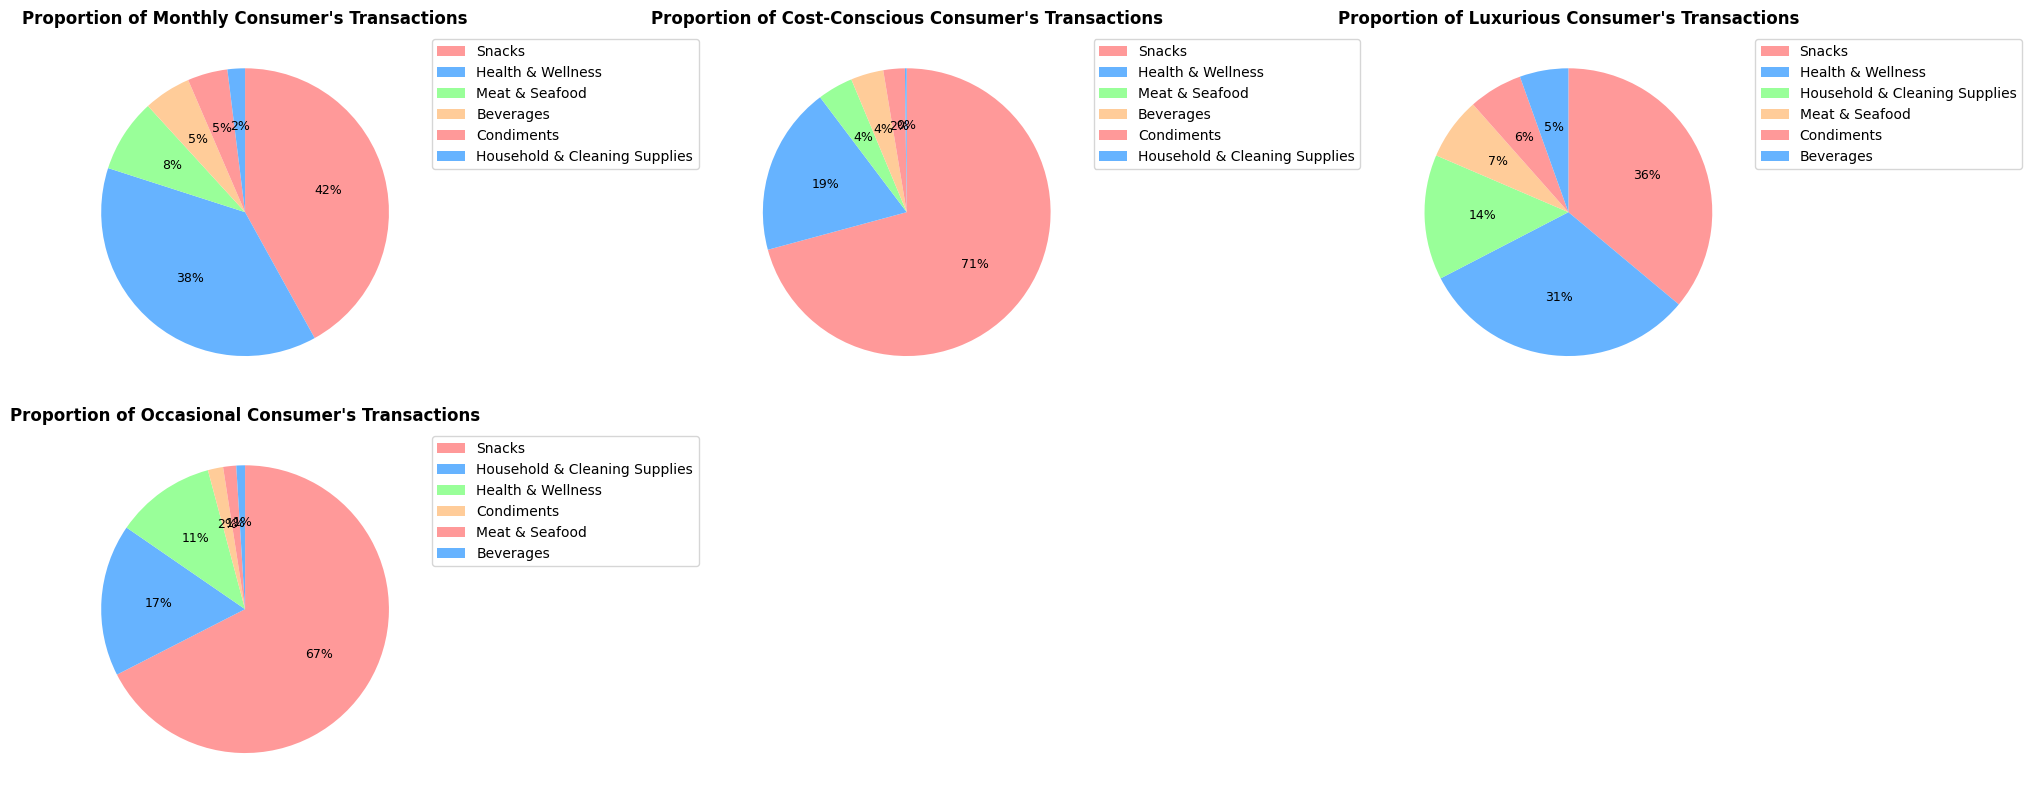

In [ ]:
plt.figure(figsize=(20, 20))

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

for i, c in enumerate(nba_df["SHOPPER"].unique()):
  cat = "SHOPPER"
  plt.subplot(5, 3, i+1)
  plt.style.use('fast')

  sorted = nba_df[nba_df["SHOPPER"] == c]["PRODUCT_TYPE"].value_counts().sort_values(ascending=False)
  sorted.plot(kind='pie', fontsize=9, autopct='%1.f%%', startangle=-270, labels=None, counterclock=False, colors = colors)
  plt.legend(labels=sorted.rename(lambda x: x.title().replace('_', ' ')).index, bbox_to_anchor=(1, 1))
  plt.title(f"Proportion of {c} Consumer's Transactions", weight="bold")
  plt.tight_layout()
  plt.ylabel('')

In [ ]:
# Function to perform EDA for each shopper type
def eda_shopper_type(shopper_type):
    print(f"\n--- EDA for Shopper Type: {shopper_type} ---")
    df_shopper = nba_df[nba_df['SHOPPER'] == shopper_type]

    # Distribution of transactions over time
    plt.figure(figsize=(15, 6))
    df_shopper['TRANS_DATE'].hist(bins=50)
    plt.title(f'Distribution of Transactions Over Time for {shopper_type}')
    plt.xlabel('Transaction Date')
    plt.ylabel('Frequency')
    plt.show()

    # Most frequent product types
    plt.figure(figsize=(15, 6))
    df_shopper['PRODUCT_TYPE'].value_counts().plot(kind='bar')
    plt.title(f'Most Frequent Product Types for {shopper_type}')
    plt.xlabel('Product Type')
    plt.ylabel('Frequency')
    plt.show()

    # Most frequent product brands
    # Calculate the value counts for PRODUCT_BRAND
    product_brand_counts = nba_df['PRODUCT_BRAND'].value_counts()

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = product_brand_counts.quantile(0.25)
    Q3 = product_brand_counts.quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for filtering outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the brands that are considered outliers
    filtered_product_brands = product_brand_counts[(product_brand_counts >= lower_bound) & (product_brand_counts <= upper_bound)]

    # Plot the most frequent product brands without outliers
    plt.figure(figsize=(15, 6))
    filtered_product_brands.plot(kind='bar')
    plt.title(f'Most Frequent Product Brands for {shopper_type} (Outliers Removed)')
    plt.xlabel('Product Brand')
    plt.ylabel('Frequency')
    plt.show()

    # Recency of the last transaction
    recency = (df_shopper['TRANS_DATE'].max() - df_shopper['TRANS_DATE']).dt.days
    plt.figure(figsize=(15, 6))
    recency.hist(bins=50)
    plt.title(f'Recency of Transactions for {shopper_type}')
    plt.xlabel('Days Since Last Transaction')
    plt.ylabel('Frequency')
    plt.show()


--- EDA for Shopper Type: Monthly ---


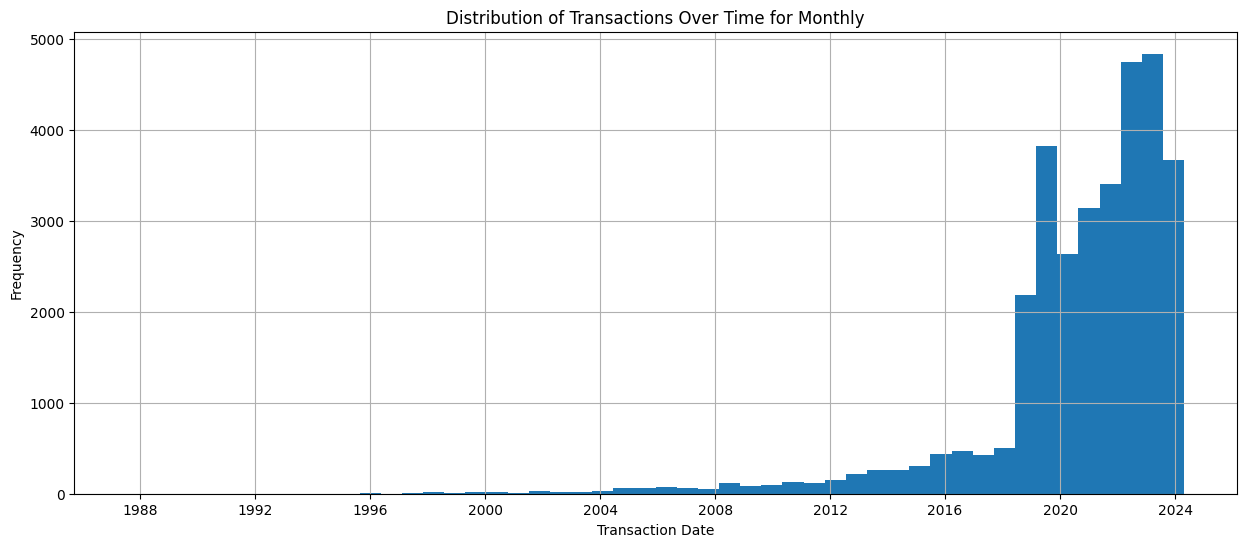

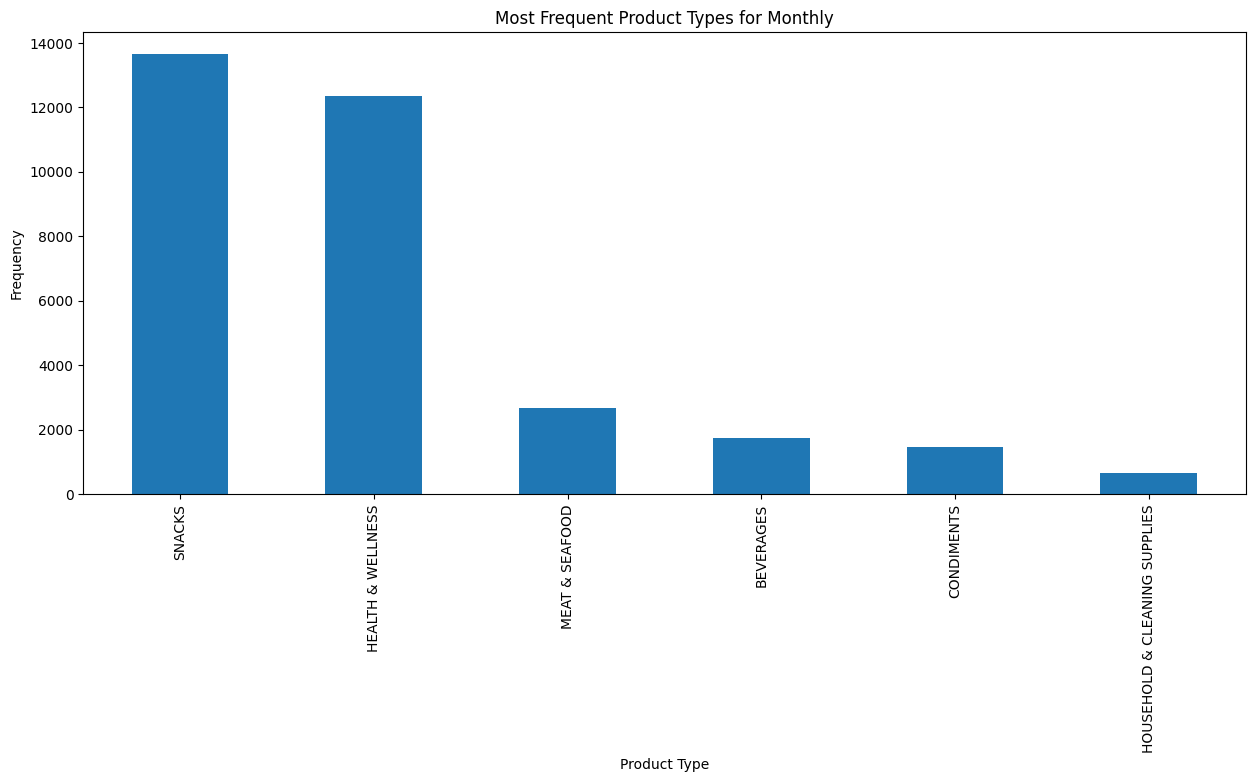

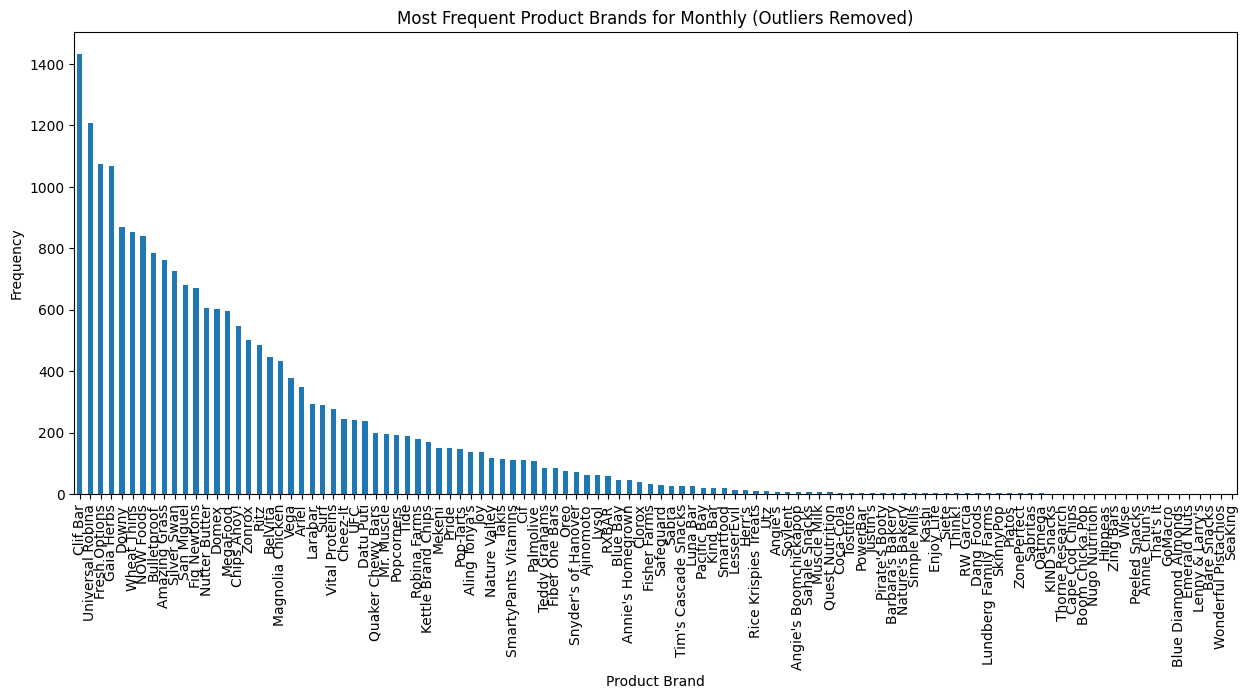

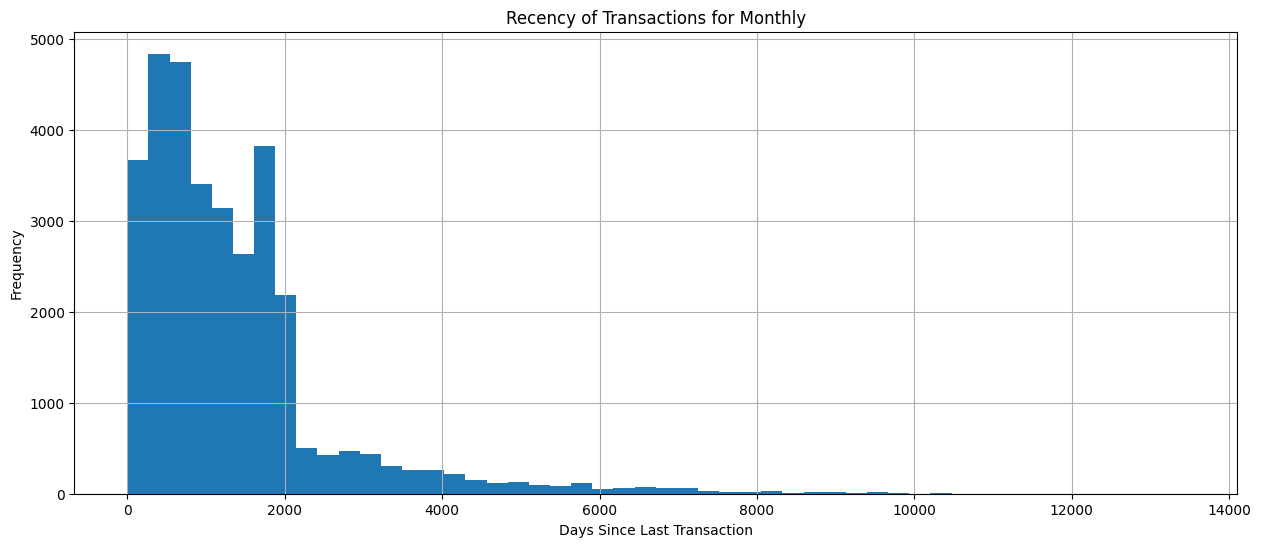


--- EDA for Shopper Type: Cost-Conscious ---


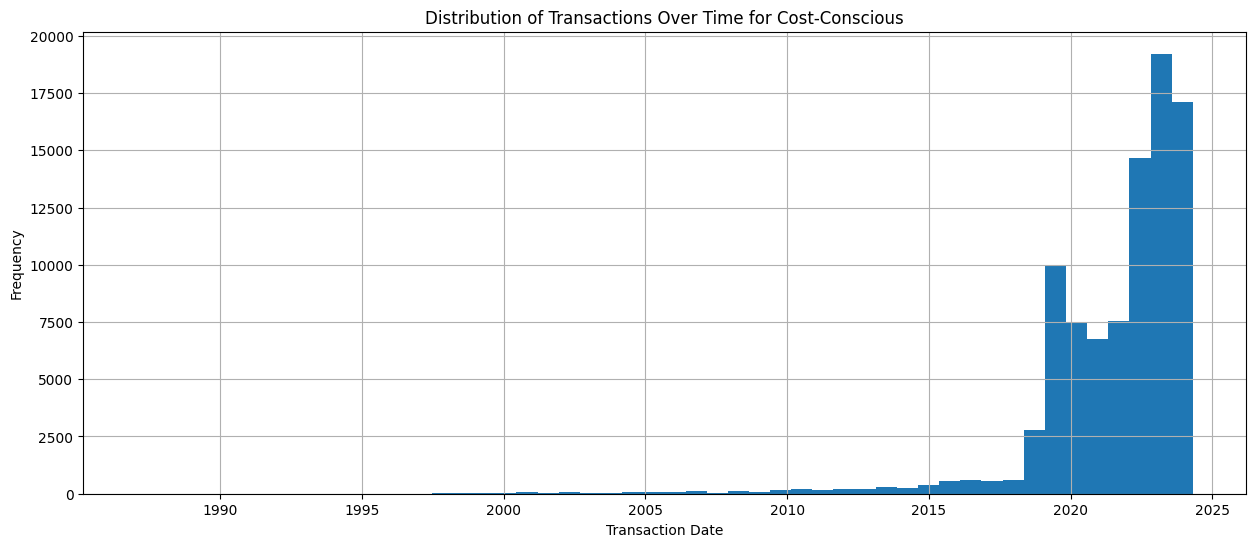

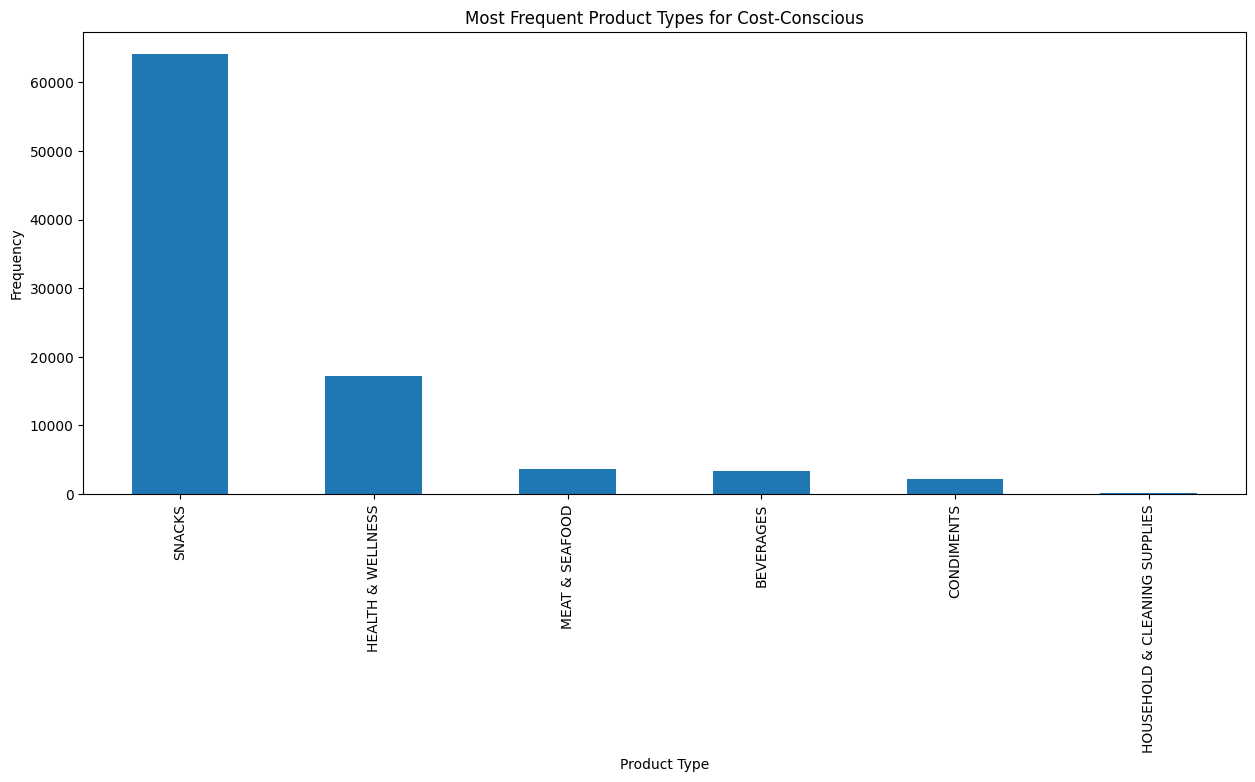

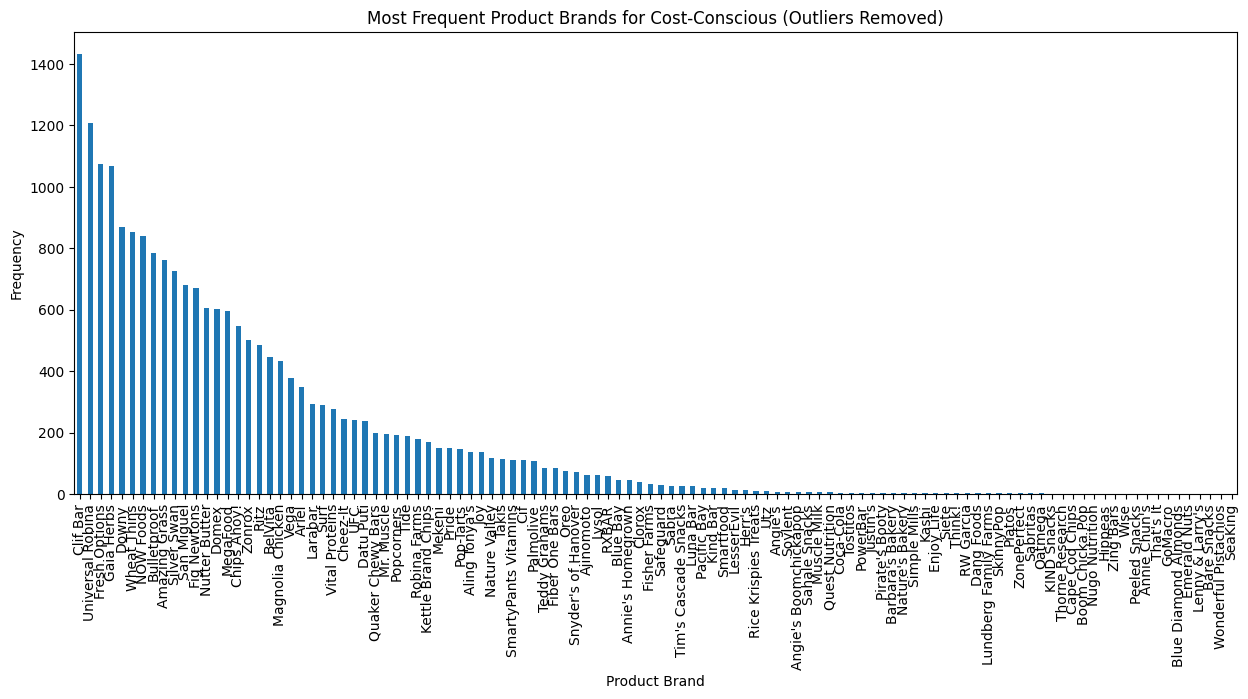

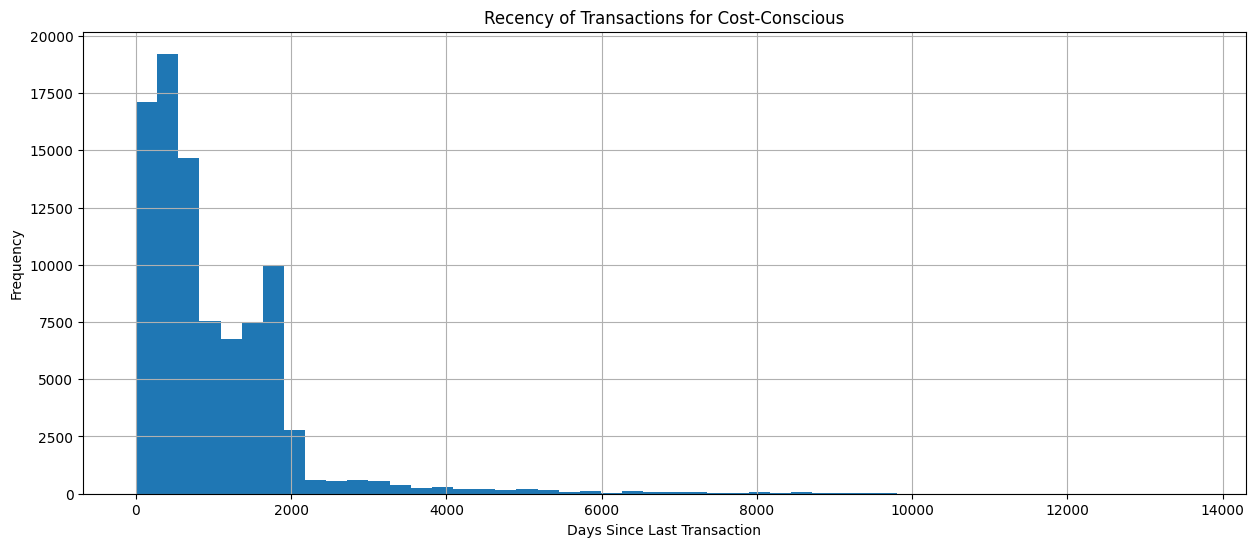


--- EDA for Shopper Type: Luxurious ---


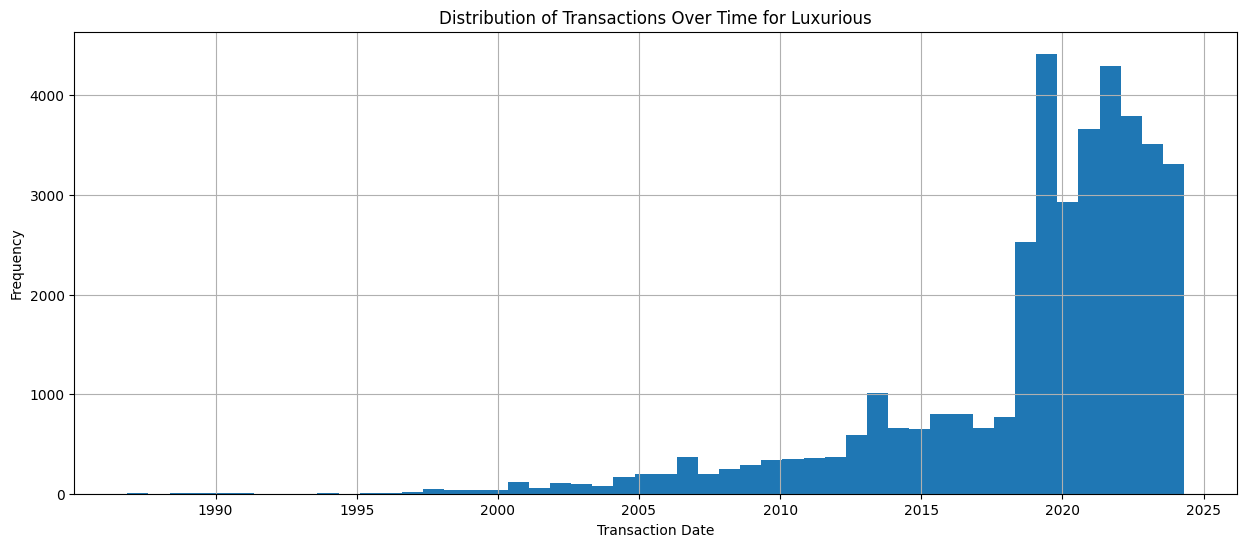

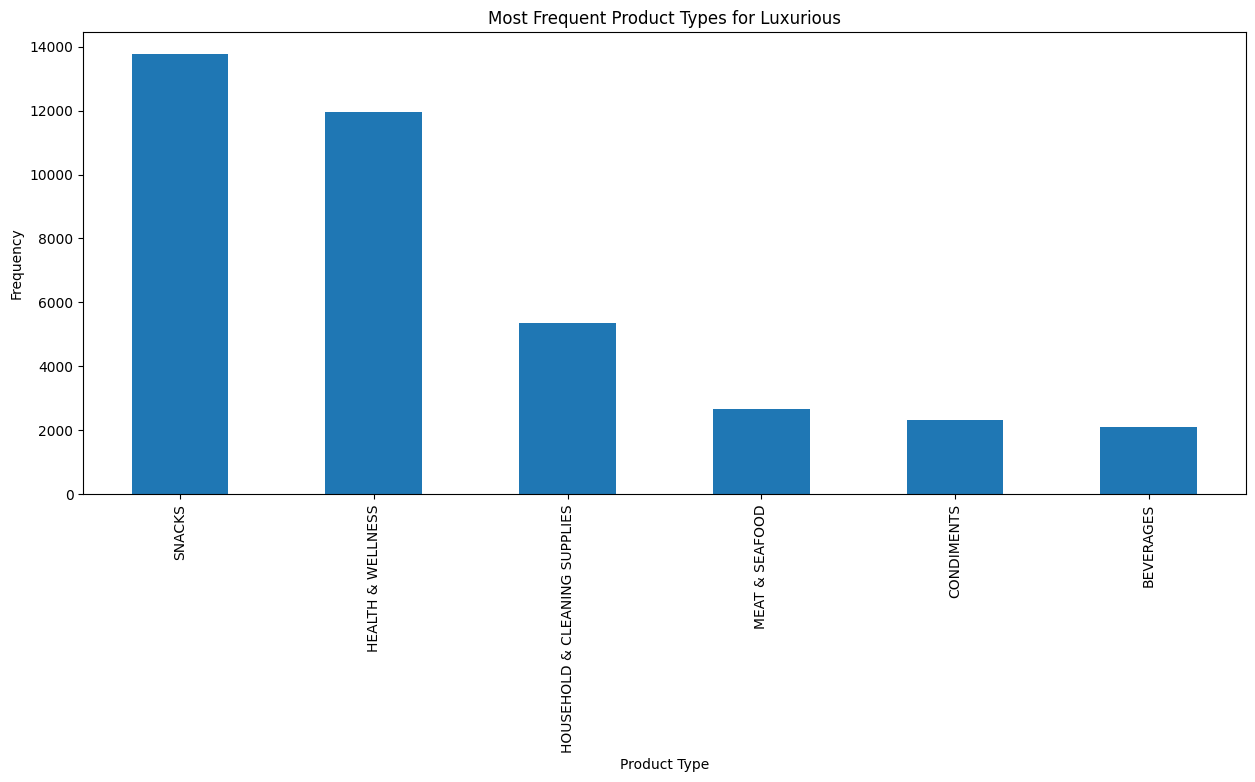

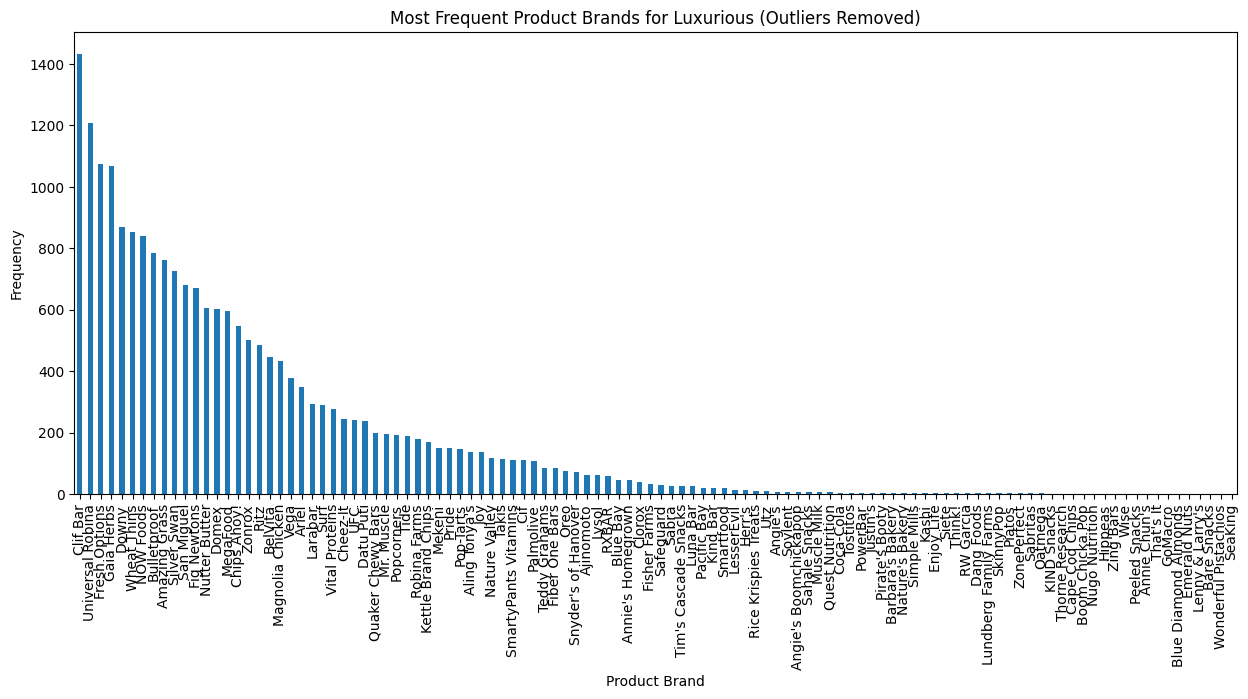

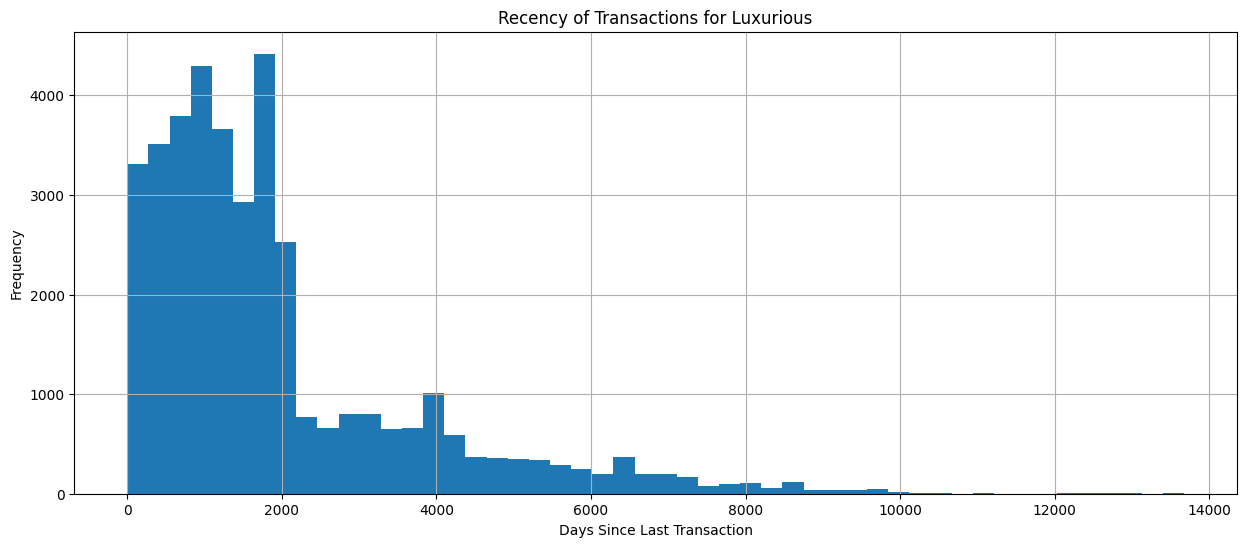


--- EDA for Shopper Type: Occasional ---


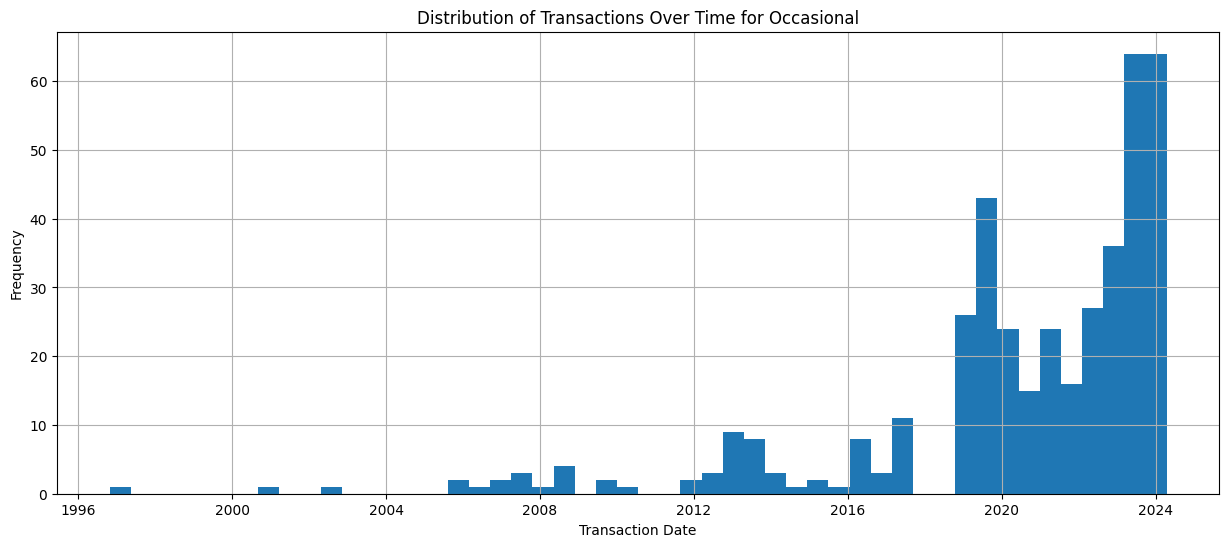

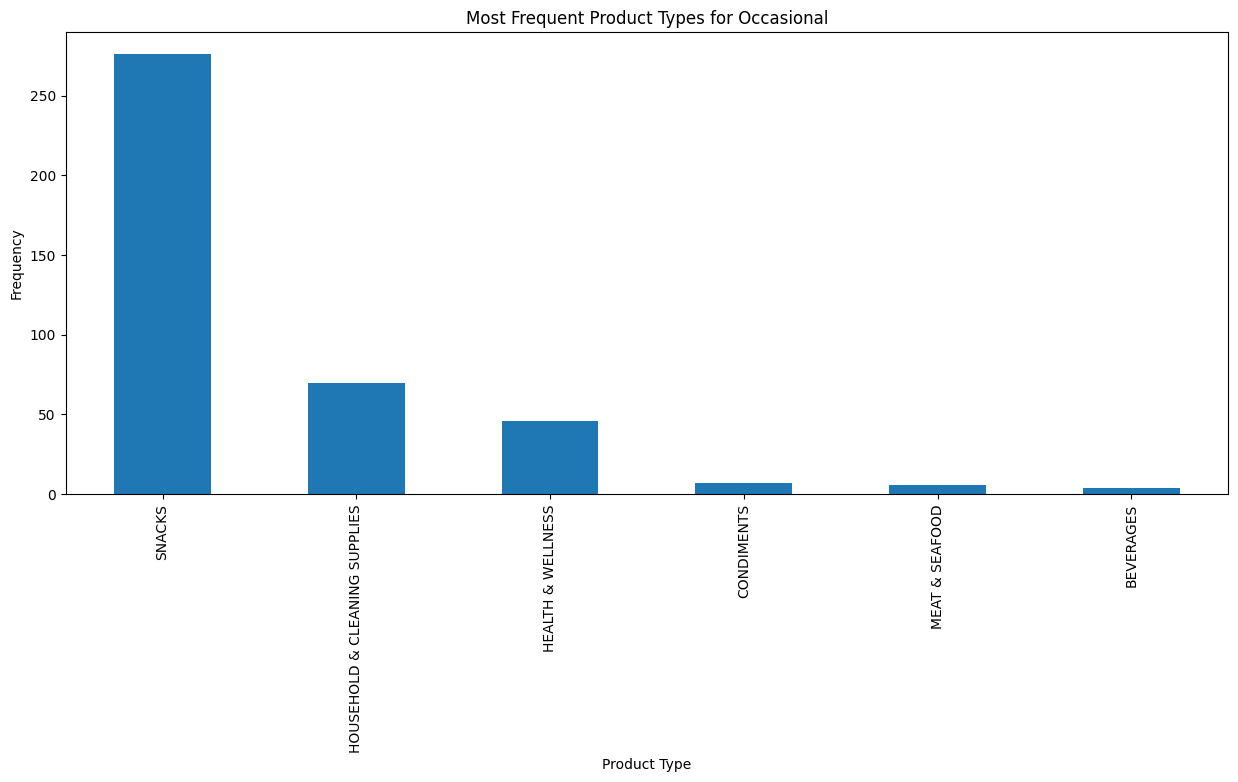

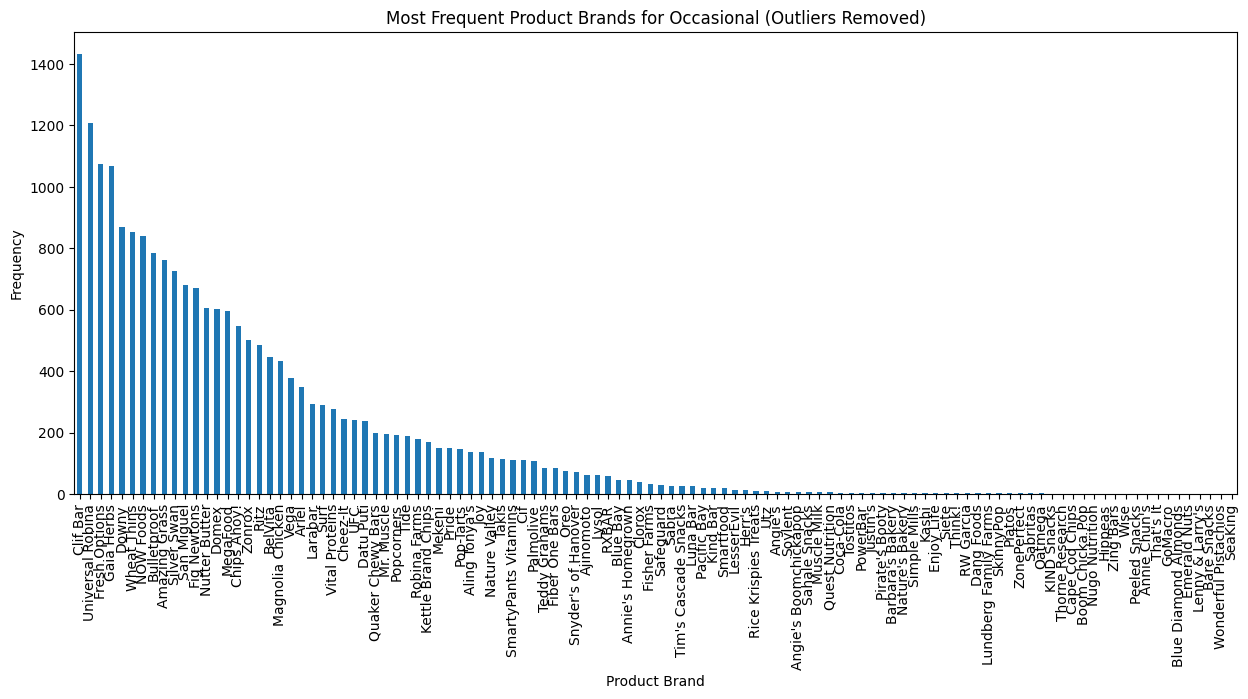

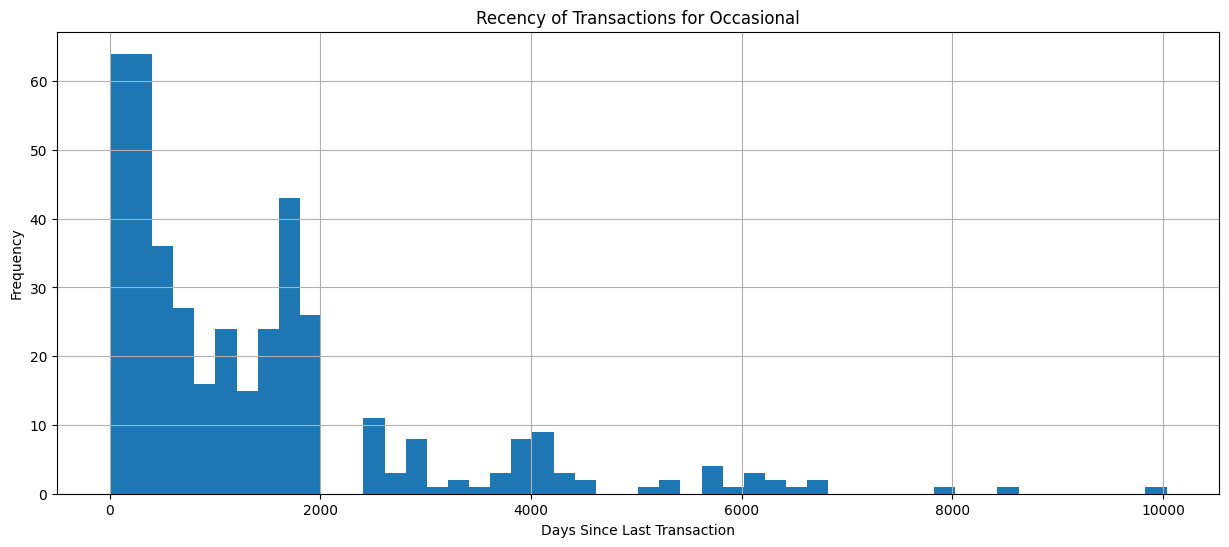

In [ ]:
# Perform EDA for each shopper type
shopper_types = nba_df['SHOPPER'].unique()

for shopper_type in shopper_types:
    eda_shopper_type(shopper_type)

## Feature Engineering

In [ ]:
# Total transactions per customer
customer_transactions = nba_df.groupby('CST_ID').size().reset_index(name='TOTAL_TRANSACTIONS')
customer_transactions

,CST_ID,TOTAL_TRANSACTIONS
0,19.0,2
1,31.0,3
2,36.0,1
3,47.0,2
4,56.0,1
...,...,...
85159,999912.0,1
85160,999922.0,2
85161,999931.0,2
85162,999972.0,2


In [ ]:
# Most frequently bought product type per customer
most_frequent_product_type = nba_df.groupby(['CST_ID', 'PRODUCT_TYPE']).size().reset_index(name='COUNTS')
most_frequent_product_type = most_frequent_product_type.loc[most_frequent_product_type.groupby('CST_ID')['COUNTS'].idxmax()]
most_frequent_product_type

,CST_ID,PRODUCT_TYPE,COUNTS
0,19.0,HEALTH & WELLNESS,2
1,31.0,HEALTH & WELLNESS,2
3,36.0,SNACKS,1
4,47.0,HEALTH & WELLNESS,1
6,56.0,SNACKS,1
...,...,...,...
115514,999912.0,SNACKS,1
115515,999922.0,SNACKS,2
115516,999931.0,HEALTH & WELLNESS,2
115517,999972.0,SNACKS,2


In [ ]:
# Most frequently bought product brand per customer
most_frequent_product_brand = nba_df.groupby(['CST_ID', 'PRODUCT_BRAND']).size().reset_index(name='COUNTS')
most_frequent_product_brand = most_frequent_product_brand.loc[most_frequent_product_brand.groupby('CST_ID')['COUNTS'].idxmax()]
most_frequent_product_brand

,CST_ID,PRODUCT_BRAND,COUNTS
0,19.0,Garden of Life,1
2,31.0,Fritos,1
5,36.0,Cheetos,1
6,47.0,Lay's,1
8,56.0,Lay's,1
...,...,...,...
149347,999912.0,Lay's,1
149348,999922.0,Lay's,1
149350,999931.0,Garden of Life,1
149352,999972.0,Lay's,1


In [ ]:
# Recency of the last transaction per customer
recency = nba_df.groupby('CST_ID')['TRANS_DATE'].max().reset_index()
recency['RECENCY'] = (nba_df['TRANS_DATE'].max() - recency['TRANS_DATE']).dt.days
recency

,CST_ID,TRANS_DATE,RECENCY
0,19.0,2023-12-21,125
1,31.0,2019-02-21,1889
2,36.0,2023-08-09,259
3,47.0,2022-10-30,542
4,56.0,2023-11-03,173
...,...,...,...
85159,999912.0,2022-03-18,768
85160,999922.0,2020-07-14,1380
85161,999931.0,2018-12-14,1958
85162,999972.0,2021-12-06,870


In [ ]:
# Last product type purchased per customer
last_product_type = nba_df.sort_values(by=['CST_ID', 'TRANS_DATE']).groupby('CST_ID').last().reset_index()[['CST_ID', 'PRODUCT_TYPE']]
last_product_type.rename(columns={'PRODUCT_TYPE': 'LAST_PRODUCT_TYPE'}, inplace=True)
last_product_type

,CST_ID,LAST_PRODUCT_TYPE
0,19.0,HEALTH & WELLNESS
1,31.0,SNACKS
2,36.0,SNACKS
3,47.0,SNACKS
4,56.0,SNACKS
...,...,...
85159,999912.0,SNACKS
85160,999922.0,SNACKS
85161,999931.0,HEALTH & WELLNESS
85162,999972.0,SNACKS


In [ ]:
# Merge features into a single dataframe
features = customer_transactions.merge(most_frequent_product_type[['CST_ID', 'PRODUCT_TYPE']], on='CST_ID')
features = features.merge(most_frequent_product_brand[['CST_ID', 'PRODUCT_BRAND']], on='CST_ID')
features = features.merge(recency[['CST_ID', 'RECENCY']], on='CST_ID')
features = features.merge(last_product_type, on='CST_ID')

features

,CST_ID,TOTAL_TRANSACTIONS,PRODUCT_TYPE,PRODUCT_BRAND,RECENCY,LAST_PRODUCT_TYPE
0,19.0,2,HEALTH & WELLNESS,Garden of Life,125,HEALTH & WELLNESS
1,31.0,3,HEALTH & WELLNESS,Fritos,1889,SNACKS
2,36.0,1,SNACKS,Cheetos,259,SNACKS
3,47.0,2,HEALTH & WELLNESS,Lay's,542,SNACKS
4,56.0,1,SNACKS,Lay's,173,SNACKS
...,...,...,...,...,...,...
85159,999912.0,1,SNACKS,Lay's,768,SNACKS
85160,999922.0,2,SNACKS,Lay's,1380,SNACKS
85161,999931.0,2,HEALTH & WELLNESS,Garden of Life,1958,HEALTH & WELLNESS
85162,999972.0,2,SNACKS,Lay's,870,SNACKS


## Modelling

In [ ]:
# Encode categorical features
features_encoded = pd.get_dummies(features, columns=['PRODUCT_TYPE', 'PRODUCT_BRAND'])
features_encoded.head()

,CST_ID,TOTAL_TRANSACTIONS,RECENCY,LAST_PRODUCT_TYPE,PRODUCT_TYPE_BEVERAGES,PRODUCT_TYPE_CONDIMENTS,PRODUCT_TYPE_HEALTH & WELLNESS,PRODUCT_TYPE_HOUSEHOLD & CLEANING SUPPLIES,PRODUCT_TYPE_MEAT & SEAFOOD,PRODUCT_TYPE_SNACKS,...,PRODUCT_BRAND_Snyder's of Hanover,PRODUCT_BRAND_Surf,PRODUCT_BRAND_Takis,PRODUCT_BRAND_Tim's Cascade Snacks,PRODUCT_BRAND_Triscuit,PRODUCT_BRAND_UFC,PRODUCT_BRAND_Universal Robina,PRODUCT_BRAND_Vega,PRODUCT_BRAND_Wheat Thins,PRODUCT_BRAND_Zonrox
0,19.0,2,125,HEALTH & WELLNESS,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,31.0,3,1889,SNACKS,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,36.0,1,259,SNACKS,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,47.0,2,542,SNACKS,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,56.0,1,173,SNACKS,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


### Data Preparation

In [ ]:
# Create the target variable: next product type purchased
nba_df['NEXT_PRODUCT_TYPE'] = nba_df.groupby('CST_ID')['PRODUCT_TYPE'].shift(-1)
target = nba_df.dropna(subset=['NEXT_PRODUCT_TYPE'])[['CST_ID', 'NEXT_PRODUCT_TYPE']]

# Merge features with the target variable
data = features.merge(target, on='CST_ID')
print(data.head())

   CST_ID  TOTAL_TRANSACTIONS       PRODUCT_TYPE   PRODUCT_BRAND  RECENCY  \
0    19.0                   2  HEALTH & WELLNESS  Garden of Life      125   
1    31.0                   3  HEALTH & WELLNESS          Fritos     1889   
2    31.0                   3  HEALTH & WELLNESS          Fritos     1889   
3    47.0                   2  HEALTH & WELLNESS           Lay's      542   
4   133.0                   6     MEAT & SEAFOOD        Monterey       48   

   LAST_PRODUCT_TYPE  NEXT_PRODUCT_TYPE  
0  HEALTH & WELLNESS  HEALTH & WELLNESS  
1             SNACKS  HEALTH & WELLNESS  
2             SNACKS  HEALTH & WELLNESS  
3             SNACKS  HEALTH & WELLNESS  
4     MEAT & SEAFOOD     MEAT & SEAFOOD  


### Model Training

In [ ]:
# Encode categorical features
label_encoder_product_type = LabelEncoder()
label_encoder_product_brand = LabelEncoder()
label_encoder_last_product_type = LabelEncoder()
label_encoder_next_product_type = LabelEncoder()

data['PRODUCT_TYPE'] = label_encoder_product_type.fit_transform(data['PRODUCT_TYPE'])
data['PRODUCT_BRAND'] = label_encoder_product_brand.fit_transform(data['PRODUCT_BRAND'])
data['LAST_PRODUCT_TYPE'] = label_encoder_last_product_type.fit_transform(data['LAST_PRODUCT_TYPE'])
data['NEXT_PRODUCT_TYPE'] = label_encoder_next_product_type.fit_transform(data['NEXT_PRODUCT_TYPE'])

# Define features and target
X = data.drop(columns=['CST_ID', 'NEXT_PRODUCT_TYPE'])
y = data['NEXT_PRODUCT_TYPE']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Decode the predicted labels for readability
y_pred_decoded = label_encoder_next_product_type.inverse_transform(y_pred)
print("Predicted next product types:", y_pred_decoded[:10])

Accuracy: 0.5717147959405897
              precision    recall  f1-score   support

           0       0.25      0.17      0.20      1057
           1       0.31      0.25      0.28      1164
           2       0.56      0.57      0.56      7589
           3       0.50      0.59      0.54      1683
           4       0.34      0.29      0.31      1496
           5       0.67      0.70      0.68      9970

    accuracy                           0.57     22959
   macro avg       0.44      0.43      0.43     22959
weighted avg       0.56      0.57      0.57     22959

Predicted next product types: ['BEVERAGES' 'CONDIMENTS' 'SNACKS' 'CONDIMENTS' 'SNACKS'
 'HEALTH & WELLNESS' 'HEALTH & WELLNESS' 'BEVERAGES' 'SNACKS' 'SNACKS']


#### Hyperparameter Tuning

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found by GridSearchCV:", best_params)

# Train the model with the best parameters
best_clf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_clf.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Decode the predicted labels for readability
y_pred_decoded = label_encoder_next_product_type.inverse_transform(y_pred)
print("Predicted next product types:", y_pred_decoded[:10])

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found by GridSearchCV: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.692233982316303
              precision    recall  f1-score   support

           0       0.58      0.23      0.33      1057
           1       0.64      0.34      0.44      1164
           2       0.64      0.79      0.71      7589
           3       0.61      0.68      0.64      1683
           4       0.54      0.35      0.43      1496
           5       0.78      0.76      0.77      9970

    accuracy                           0.69     22959
   macro avg       0.63      0.53      0.55     22959
weighted avg       0.69      0.69      0.68     22959

Predicted next product types: ['BEVERAGES' 'CONDIMENTS' 'SNACKS' 'HEALTH & WELLNESS' 'SNACKS'
 'HEALTH & WELLNESS' 'HEALTH & WELLNESS' 'HEALTH & WELLNESS' 'SNACKS'
 'SNACKS']


In [ ]:
features.dtypes

CST_ID                float64
TOTAL_TRANSACTIONS      int64
PRODUCT_TYPE           object
PRODUCT_BRAND          object
RECENCY                 int64
LAST_PRODUCT_TYPE      object
dtype: object

In [ ]:
# Define a function to prepare data for modeling
def prepare_data(df):
    # Total transactions per customer
    customer_transactions = df.groupby('CST_ID').size().reset_index(name='TOTAL_TRANSACTIONS')

    # Most frequently bought product type per customer
    most_frequent_product_type = df.groupby(['CST_ID', 'PRODUCT_TYPE']).size().reset_index(name='COUNTS')
    most_frequent_product_type = most_frequent_product_type.loc[most_frequent_product_type.groupby('CST_ID')['COUNTS'].idxmax()]

    # Most frequently bought product brand per customer
    most_frequent_product_brand = df.groupby(['CST_ID', 'PRODUCT_BRAND']).size().reset_index(name='COUNTS')
    most_frequent_product_brand = most_frequent_product_brand.loc[most_frequent_product_brand.groupby('CST_ID')['COUNTS'].idxmax()]

    # Recency of the last transaction per customer
    recency = df.groupby('CST_ID')['TRANS_DATE'].max().reset_index()
    recency['RECENCY'] = (df['TRANS_DATE'].max() - recency['TRANS_DATE']).dt.days

    # Last product type purchased per customer
    last_product_type = df.sort_values(by=['CST_ID', 'TRANS_DATE']).groupby('CST_ID').last().reset_index()[['CST_ID', 'PRODUCT_TYPE']]
    last_product_type.rename(columns={'PRODUCT_TYPE': 'LAST_PRODUCT_TYPE'}, inplace=True)

    # Merge features into a single dataframe
    features = customer_transactions.merge(most_frequent_product_type[['CST_ID', 'PRODUCT_TYPE']], on='CST_ID')
    features = features.merge(most_frequent_product_brand[['CST_ID', 'PRODUCT_BRAND']], on='CST_ID')
    features = features.merge(recency[['CST_ID', 'RECENCY']], on='CST_ID')
    features = features.merge(last_product_type, on='CST_ID')

    # Create the target variable: next product type purchased
    df.loc[:, 'NEXT_PRODUCT_TYPE'] = df.groupby('CST_ID')['PRODUCT_TYPE'].shift(-1)
    target = df.dropna(subset=['NEXT_PRODUCT_TYPE'])[['CST_ID', 'NEXT_PRODUCT_TYPE']]


    # Merge features with the target variable
    data = features.merge(target, on='CST_ID')

    return data

In [ ]:
# Prepare the data
data = prepare_data(nba_df)

# Encode categorical features
label_encoder_product_type = LabelEncoder()
label_encoder_product_brand = LabelEncoder()
label_encoder_last_product_type = LabelEncoder()
label_encoder_next_product_type = LabelEncoder()

data['PRODUCT_TYPE'] = label_encoder_product_type.fit_transform(data['PRODUCT_TYPE'])
data['PRODUCT_BRAND'] = label_encoder_product_brand.fit_transform(data['PRODUCT_BRAND'])
data['LAST_PRODUCT_TYPE'] = label_encoder_last_product_type.fit_transform(data['LAST_PRODUCT_TYPE'])
data['NEXT_PRODUCT_TYPE'] = label_encoder_next_product_type.fit_transform(data['NEXT_PRODUCT_TYPE'])

# Define features and target
X = data.drop(columns=['CST_ID', 'NEXT_PRODUCT_TYPE'])
y = data['NEXT_PRODUCT_TYPE']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Function to predict next best action for a given customer ID
def predict_next_best_action(customer_id, df, model=clf):
    shopper_type = df.loc[df['CST_ID'] == customer_id, 'SHOPPER'].iloc[0]
    df_shopper = df[df['SHOPPER'] == shopper_type]

    data = prepare_data(df_shopper)

    if customer_id not in data['CST_ID'].values:
        return f"Customer ID {customer_id} not found for shopper type {shopper_type}"

    customer_data = data[data['CST_ID'] == customer_id].drop(columns=['CST_ID', 'NEXT_PRODUCT_TYPE'])

    customer_data['PRODUCT_TYPE'] = label_encoder_product_type.transform(customer_data['PRODUCT_TYPE'])
    customer_data['PRODUCT_BRAND'] = label_encoder_product_brand.transform(customer_data['PRODUCT_BRAND'])
    customer_data['LAST_PRODUCT_TYPE'] = label_encoder_last_product_type.transform(customer_data['LAST_PRODUCT_TYPE'])

    next_product_type_encoded = model.predict(customer_data)[0]

    next_product_type = label_encoder_next_product_type.inverse_transform([next_product_type_encoded])[0]

    return next_product_type

In [ ]:
# Example usage
customer_id = 31.0  # Replace with an actual customer ID from your dataset
next_best_action = predict_next_best_action(customer_id, nba_df)
print(f"The next best action for customer ID {customer_id} ({shopper_type} shopper) is to recommend the product type: {next_best_action}")

The next best action for customer ID 31.0 (Occasional shopper) is to recommend the product type: HEALTH & WELLNESS
